<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 3</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

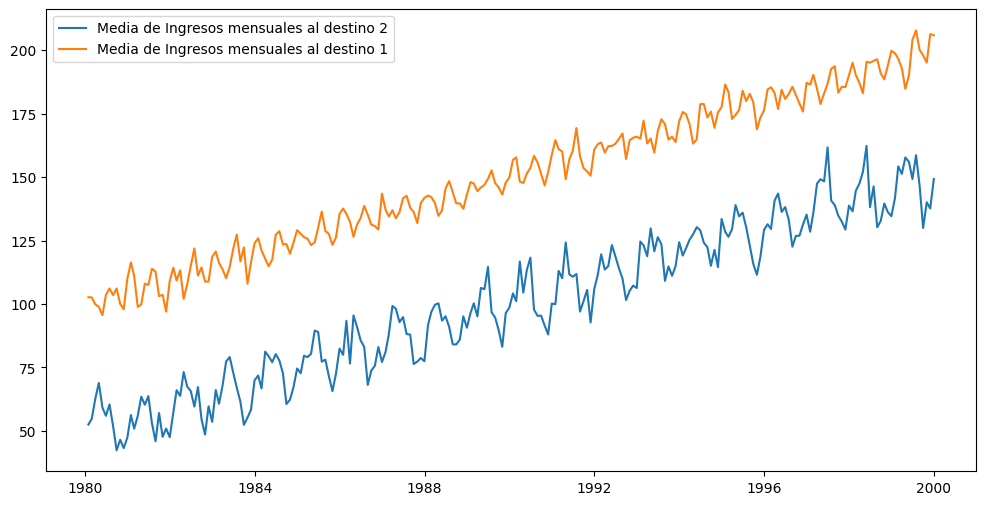

In [ ]:
url = 'https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/DatasetClase.csv'
df = pd.read_csv(url)

df.dias = pd.to_datetime(df.dias)
df.set_index("dias", inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['MediaIngresosdestino2'], label='Media de Ingresos mensuales al destino 2')
plt.plot(df['MediaIngresosdestino2.1'], label='Media de Ingresos mensuales al destino 1')
plt.legend()
plt.show()


In [ ]:
df.head()

,MediaIngresosdestino2,MediaIngresosdestino2.1
dias,,
1980-01-31,52.483571,102.622438
1980-02-29,54.727089,102.574201
1980-03-31,62.735517,99.851782
1980-04-30,68.870379,98.852496
1980-05-31,59.163127,95.572751


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:               MediaIngresosdestino2   No. Observations:                  216
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood                -686.368
Date:                             Tue, 08 Oct 2024   AIC                           1384.736
Time:                                     18:20:24   BIC                           1404.960
Sample:                                 01-31-1980   HQIC                          1392.907
                                      - 12-31-1997                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8894      0.048    -18.694      0.000      -0.983      -0.796
ma.L1          0.0773      

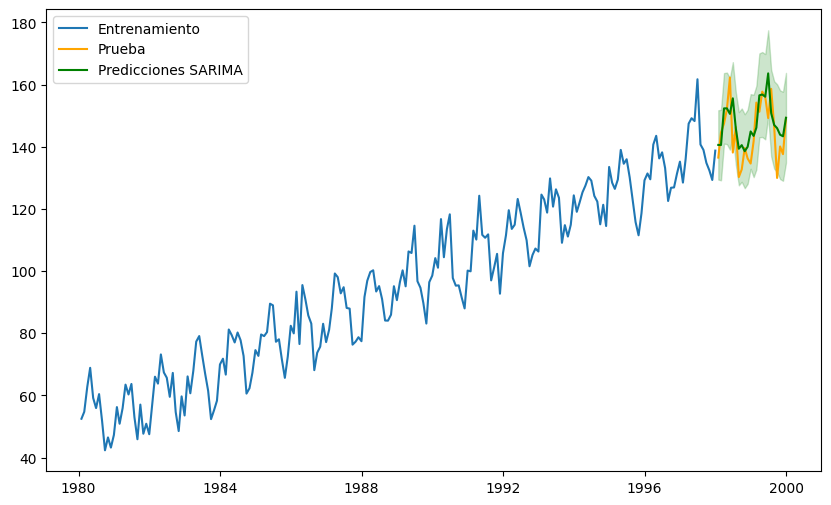

In [ ]:
# Dividimos la base en entrenamiento y prueba
train = df.iloc[:-24]
test = df.iloc[-24:]

# Modelo SARIMA a la primera serie
modelo_sarima = sm.tsa.SARIMAX(train['MediaIngresosdestino2'], order=(1,1,2), seasonal_order=(2,0,0,12))
resultado_sarima = modelo_sarima.fit()


print(resultado_sarima.summary())

# Predicciones del modelo SARIMA
pred_sarima = resultado_sarima.get_forecast(steps=24)
pred_conf_int_sarima = pred_sarima.conf_int()

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['MediaIngresosdestino2'], label='Entrenamiento')
plt.plot(test.index, test['MediaIngresosdestino2'], label='Prueba', color='orange')
plt.plot(test.index, pred_sarima.predicted_mean, label='Predicciones SARIMA', color='green')
plt.fill_between(test.index, pred_conf_int_sarima.iloc[:, 0], pred_conf_int_sarima.iloc[:, 1], color='green', alpha=0.2)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Métricas para el modelo SARIMA
mse_sarima = mean_squared_error(test['MediaIngresosdestino2'], pred_sarima.predicted_mean)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(test['MediaIngresosdestino2'], pred_sarima.predicted_mean)
mape_sarima = np.mean(np.abs((test['MediaIngresosdestino2'] - pred_sarima.predicted_mean) / test['MediaIngresosdestino2'])) * 100


El modelo SARIMAX incorpora variables exógenas para mejorar el pronóstico de series temporales. Combina componentes autorregresivos, de media móvil y estacionales, junto con la influencia de factores externos.

Primero veo la correlacion cruzada que hay entre ambas variables.

In [ ]:
from statsmodels.tsa.stattools import ccf

MediaDestino2_array = train['MediaIngresosdestino2'].values
MediaDestino1_array = train['MediaIngresosdestino2.1'].values

<ipython-input-12-537e0e50f36e>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(lags), cross_corr, use_line_collection=True)


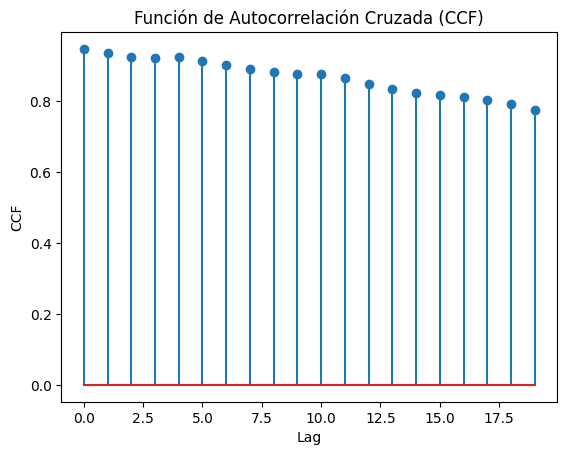

In [ ]:
# Calculo de CCF
lags = 20
cross_corr = ccf(MediaDestino2_array, MediaDestino1_array)[:lags]

# Grafico de CCF
plt.stem(range(lags), cross_corr, use_line_collection=True)
plt.title('Función de Autocorrelación Cruzada (CCF)')
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.show()

In [ ]:
cross_corr

array([0.94643345, 0.93486532, 0.92383486, 0.92083366, 0.92330337,
       0.91286231, 0.90109494, 0.89006849, 0.88105364, 0.87606937,
       0.87510746, 0.86381441, 0.84837903, 0.83437093, 0.82162443,
       0.81620023, 0.81014666, 0.8034503 , 0.79180374, 0.77476398])

In [ ]:
# Ahora armo el modelo SARIMAX con variable endogena

modelo_sarimax = sm.tsa.SARIMAX(train['MediaIngresosdestino2'], order=(1,1,2), seasonal_order=(2,0,0,12), exog=train[['MediaIngresosdestino2.1']])
resultado_sarimax = modelo_sarimax.fit()

print(resultado_sarimax.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:               MediaIngresosdestino2   No. Observations:                  216
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood                -686.003
Date:                             Tue, 08 Oct 2024   AIC                           1386.006
Time:                                     18:22:08   BIC                           1409.601
Sample:                                 01-31-1980   HQIC                          1395.540
                                      - 12-31-1997                                         
Covariance Type:                               opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
MediaIngresosdestino2.1    -0.0966      0.118     -0.818      0.413      -0.328 

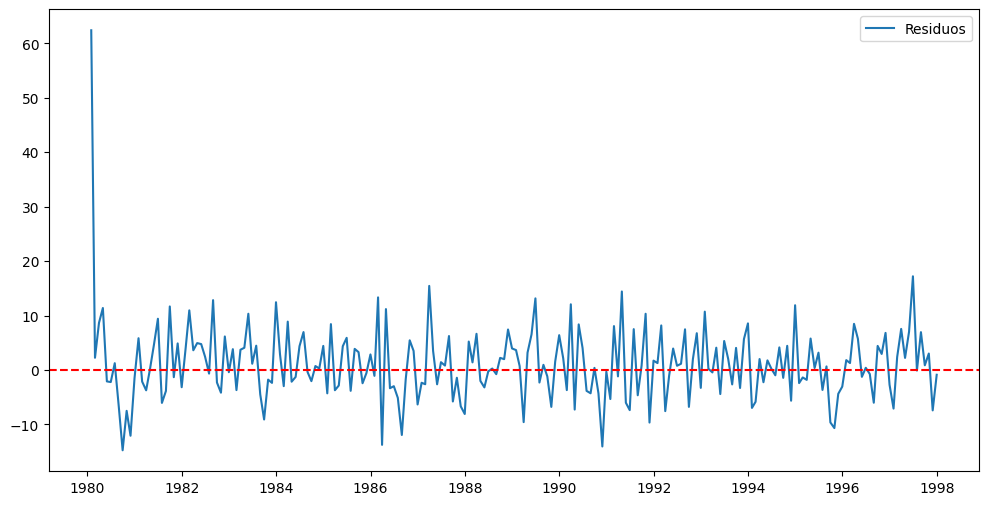

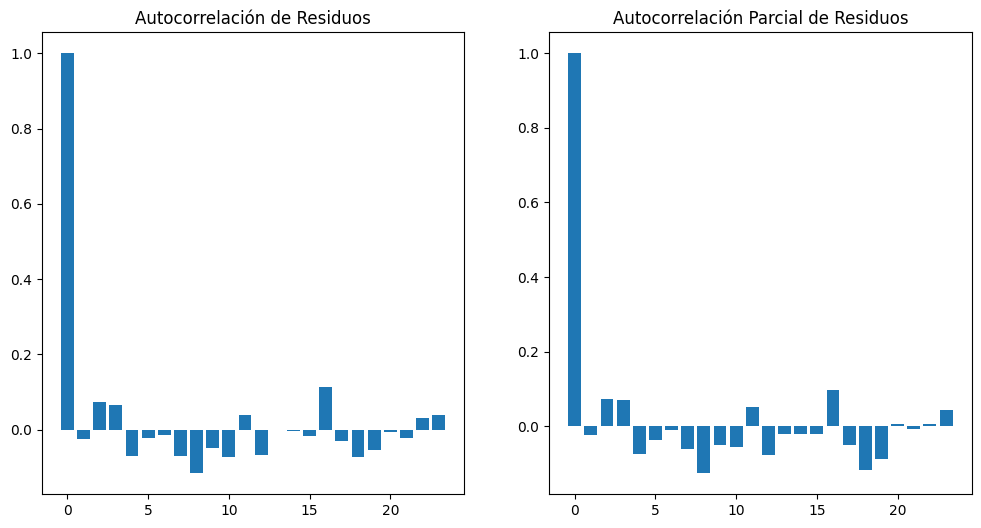

     lb_stat  lb_pvalue
10  9.346436   0.499571


In [ ]:
# Obtener los residuos del modelo SARIMAX
residuos = resultado_sarimax.resid


plt.figure(figsize=(12, 6))
plt.plot(residuos, label='Residuos')
plt.axhline(0, color='r', linestyle='--')
plt.legend()
plt.show()


acf_residuos = acf(residuos, fft=False)
pacf_residuos = pacf(residuos)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(len(acf_residuos)), acf_residuos)
plt.title('Autocorrelación de Residuos')
plt.subplot(122)
plt.bar(range(len(pacf_residuos)), pacf_residuos)
plt.title('Autocorrelación Parcial de Residuos')
plt.show()


ljung_box = sm.stats.acorr_ljungbox(residuos, lags=[10], return_df=True)
print(ljung_box)


Con un p-valor de 0.499571 no se rechaza la hipótesis nula entonces indicaria que los residuos del modelo no están autocorrelacionados.

Text(0, 0.5, 'P-valores ')

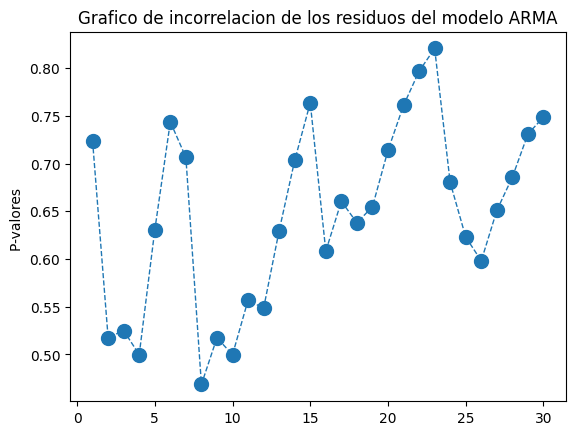

In [ ]:
Incorr_residuos_modelo_ARMA=sm.stats.acorr_ljungbox(resultado_sarimax.resid, lags=30)
plt.plot(Incorr_residuos_modelo_ARMA.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo ARMA")
plt.ylabel("P-valores ")

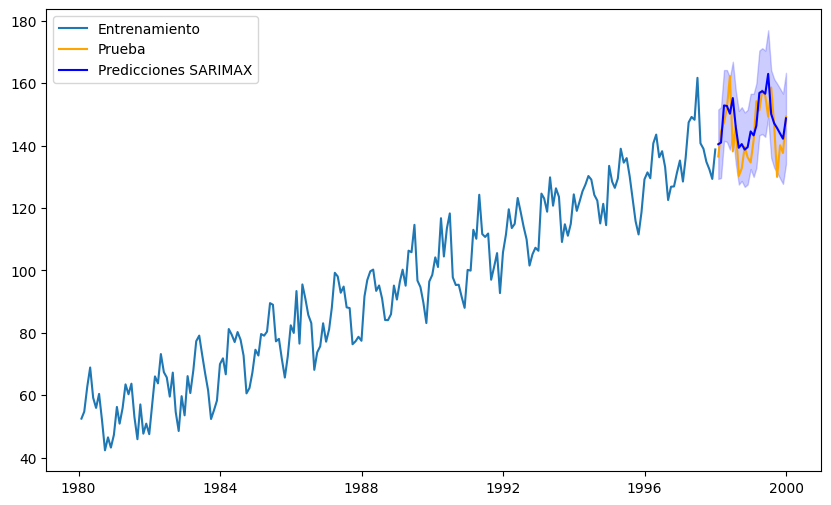

In [ ]:
# Predicciones del modelo SARIMAX
pred_sarimax = resultado_sarimax.get_forecast(steps=24, exog=test[['MediaIngresosdestino2.1']])
pred_conf_int_sarimax = pred_sarimax.conf_int()


plt.figure(figsize=(10, 6))
plt.plot(train.index, train['MediaIngresosdestino2'], label='Entrenamiento')
plt.plot(test.index, test['MediaIngresosdestino2'], label='Prueba', color='orange')
plt.plot(test.index, pred_sarimax.predicted_mean, label='Predicciones SARIMAX', color='blue')
plt.fill_between(test.index, pred_conf_int_sarimax.iloc[:, 0], pred_conf_int_sarimax.iloc[:, 1], color='blue', alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Métricas para el modelo SARIMAX
mse_sarimax = mean_squared_error(test['MediaIngresosdestino2'], pred_sarimax.predicted_mean)
rmse_sarimax = np.sqrt(mse_sarimax)
mae_sarimax = mean_absolute_error(test['MediaIngresosdestino2'], pred_sarimax.predicted_mean)
mape_sarimax = np.mean(np.abs((test['MediaIngresosdestino2'] - pred_sarimax.predicted_mean) / test['MediaIngresosdestino2'])) * 100

print(f'Métricas SARIMAX:\nMSE: {mse_sarimax}\nRMSE: {rmse_sarimax}\nMAE: {mae_sarimax}\nMAPE: {mape_sarimax}')

Métricas SARIMAX:
MSE: 57.78445790726678
RMSE: 7.601608902546012
MAE: 5.7289888257564945
MAPE: 4.030384884674506


In [ ]:
# Métricas para el modelo SARIMA calculado previamente
print(f'Métricas SARIMA:\nMSE: {mse_sarima}\nRMSE: {rmse_sarima}\nMAE: {mae_sarima}\nMAPE: {mape_sarima}')

Métricas SARIMA:
MSE: 59.72783338811983
RMSE: 7.728378444933958
MAE: 5.807663198313272
MAPE: 4.093921720525164


El modelo SARIMAX es el mejor en todas las métricas .

Fin del codigo